In [263]:
# Import Needed package for Data Processing

import pandas as pd # Package buat prosesing tabel
import numpy as np # Package buat prosesing array
import matplotlib.pyplot as plt # Package buat nampilin graph

In [264]:
df = pd.read_csv('https://raw.githubusercontent.com/Mofttach/Predictive-Maintenance-Dataset/main/ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [265]:
# Cek Data statistik bank loan
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [267]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [268]:
df['Machine failure'].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

In [269]:
df = df.drop(columns=['Product ID'])

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
 8   TWF                      10000 non-null  int64  
 9   HDF                      10000 non-null  int64  
 10  PWF                      10000 non-null  int64  
 11  OSF                      10000 non-null  int64  
 12  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1015.8+ KB


In [271]:
from sklearn.preprocessing import OneHotEncoder
#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{df_encoded}")

Encoded Employee data : 
        UDI  Air temperature [K]  Process temperature [K]  \
0         1                298.1                    308.6   
1         2                298.2                    308.7   
2         3                298.1                    308.5   
3         4                298.2                    308.6   
4         5                298.2                    308.7   
...     ...                  ...                      ...   
9995   9996                298.8                    308.4   
9996   9997                298.9                    308.4   
9997   9998                299.0                    308.6   
9998   9999                299.0                    308.7   
9999  10000                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2    

In [272]:
# Import Model untuk prediksi Customer bayar pinjaman atau tidak

from sklearn.linear_model import LogisticRegression # Package for model logistic Regression
from sklearn import metrics # Package for metrics evaluation for Logistic Regression

In [273]:
# Buat fungsi model Logistic Regression untuk memprediksi Customer bayar pinjaman atau tidak

model_logistic_regression = LogisticRegression()

In [274]:
# test and train
X = df_encoded.drop('Machine failure', axis=1)
y = df_encoded['Machine failure']

In [275]:
model_logistic_regression.fit( X, y )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [276]:
df_failure_or_not = model_logistic_regression.predict( X )

In [277]:
df_failure_or_not

array([0, 0, 0, ..., 0, 0, 0])

In [278]:
df_encoded_with_prediction = df_encoded.copy()
df_encoded_with_prediction['Machine_failure_or_not'] = df_failure_or_not
df_encoded_with_prediction

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M,Machine_failure_or_not
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0.0,0.0,1.0,0
1,2,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0.0,1.0,0.0,0
2,3,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0.0,1.0,0.0,0
3,4,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0.0,1.0,0.0,0
4,5,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,0.0,0.0,1.0,0
9996,9997,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,1.0,0.0,0.0,0
9997,9998,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,0.0,0.0,1.0,0
9998,9999,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,1.0,0.0,0.0,0


In [279]:
accuracy_model_logistic_regression = metrics.accuracy_score( y , df_failure_or_not )

print( "Accuracy model Logistic Regression Machine Failure or Not is : " + str( accuracy_model_logistic_regression ))

Accuracy model Logistic Regression Machine Failure or Not is : 0.9724


In [280]:
F1_score_model_logistic_regression = metrics.f1_score( y , df_failure_or_not )

print( "F1 Score model Logistic Regression predict Machine Failure or not is : " + str( F1_score_model_logistic_regression ))

F1 Score model Logistic Regression predict Machine Failure or not is : 0.4


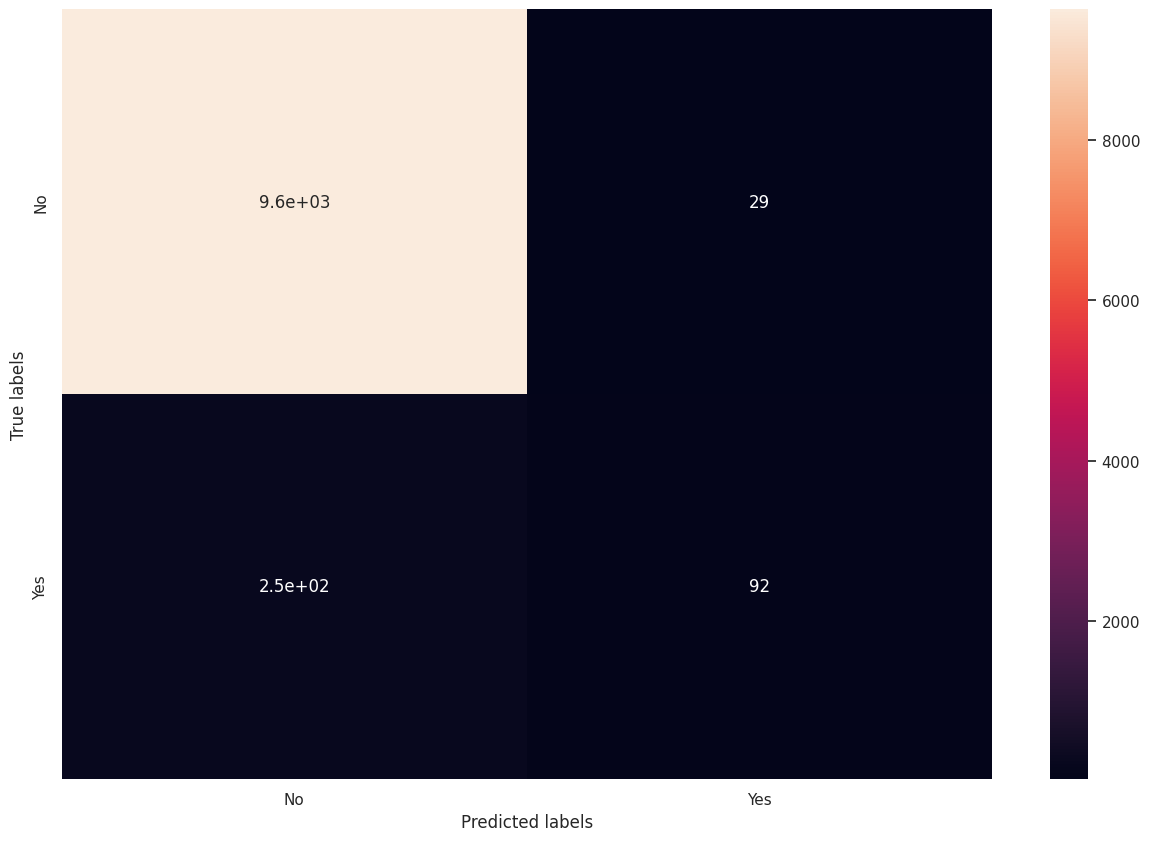

In [281]:
# Kemudian bikin confusion matrix untuk evaluasi Model Logistic Regression Customer pay loan or not

# Plot confusion matrix
from sklearn.metrics import confusion_matrix # Package untuk visualisasi confusion matrix untuk memprediksi Customer pay loar or not
import seaborn as sns # Package to visualize confusion matrix memprediksi Customer pay loan or not

plt.figure(figsize= (15,10)) # Atur ukutan con

cm= confusion_matrix(y, df_failure_or_not , labels=[0,1]) # confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
#ax.set_title('Confusion Matrix '+ str(i));
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [282]:
print( "Coefficient of Logistic Regression Model is : " + str( model_logistic_regression.coef_ ))

Coefficient of Logistic Regression Model is : [[-9.05318933e-05  3.70308579e-01 -4.57641589e-01  9.42949256e-03
   2.71618128e-01  1.12862155e-02  1.62346045e-01  3.99696667e-01
   1.83575839e-01  2.30643137e-01 -6.22807497e-05 -3.79751911e-02
   9.14135830e-02 -5.70229843e-02]]


In [283]:
# Create dataframe for feature importance of logistic regression

dict_importance_every_feature = { "Importance_Feature" : abs( model_logistic_regression.coef_[0]) } # Make dictionary with column "Importance Feature" to have feature importance of Logistic Regression Model

importance_every_feature_dataframe = pd.DataFrame( dict_importance_every_feature ) # Convert dictionary ke dataframe Pandas

# Tambahkan index datagram feature importance dengan nama kolom di dataset bank loan without null
importance_every_feature_dataframe.index = df_encoded.drop( "Machine failure" , axis = 1).columns

#plt.plot( model_logistic_regression.coef_[0].reshape(-1) , kind= "barh")
importance_every_feature_dataframe

,Importance_Feature
UDI,0.000091
Air temperature [K],0.370309
Process temperature [K],0.457642
Rotational speed [rpm],0.009429
Torque [Nm],0.271618
Tool wear [min],0.011286
TWF,0.162346
HDF,0.399697
PWF,0.183576
OSF,0.230643


<Axes: >

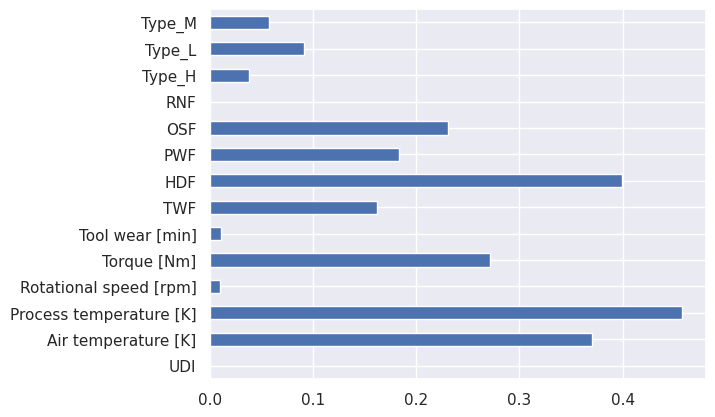

In [284]:
sns.set_theme() # Function to make Feature Importance evaluation more beautiful

importance_every_feature_dataframe[ "Importance_Feature" ].plot( kind= "barh" )